/var/folders/ln/kls56lq93mq4z_459sxk1vbh0000gn/T/ipykernel_41586/979797672.py:14: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


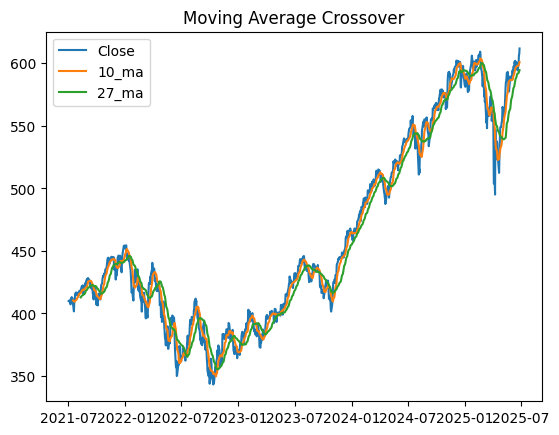

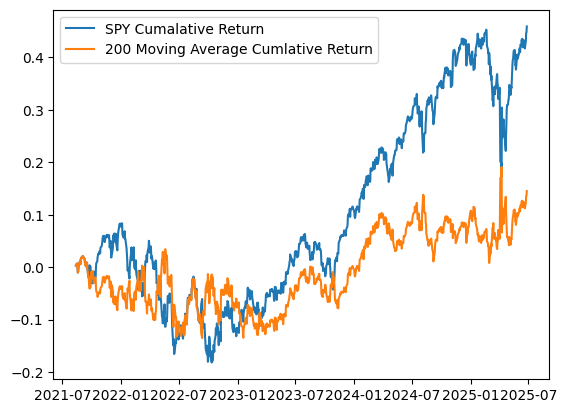

In [136]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

TICKER = "SPY"
WINDOW = 200
FAST = 10
SLOW = 27
LOOKBACK = 1000


def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)
    return df.iloc[-LOOKBACK:, :]

def add_moving_averages(df, fast, slow):
    df[f"{FAST}_ma"] = df["Close"].rolling(fast).mean()
    df[f"{SLOW}_ma"] = df["Close"].rolling(slow).mean()

    plt.plot(df["Close"])
    plt.plot(df[f"{FAST}_ma"])
    plt.plot(df[f"{SLOW}_ma"])

    plt.legend(["Close", f"{FAST}_ma", f"{SLOW}_ma"])
    plt.title("Moving Average Crossover")
    # plt.xticks(rotation=30)

    return df.dropna()


def add_strategy(df):
    df["Strategy"] = np.where(df[f"{FAST}_ma"] > df[f"{SLOW}_ma"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)
    return df.dropna()

def test_strategy(df):
    df["Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy Cumalative Return"] =  np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    
    plt.figure()
    plt.plot(df["Cumalative Return"])
    plt.plot(df["Strategy Cumalative Return"])
    plt.legend(
        [f"{TICKER} Cumalative Return", f"{WINDOW} Moving Average Cumlative Return"]
    )
    return df

df = get_data()
df = add_moving_averages(df, FAST, SLOW)
df = add_strategy(df)
df = test_strategy(df)

In [ ]:
def add_strategy(df):
    df["Strategy"] = np.where(df["Close"] > df["50-day-ma"], 1, -1)
    df["Strategy"] = df["Strategy"].shift(1)
    return df


def test_strategy(df):
    df["Cumalative Return"] = np.cumprod(1 + df["Close"].pct_change()) - 1
    df["Strategy Cumalative Return"] = (
        np.cumprod(1 + df["Close"].pct_change() * df["Strategy"]) - 1
    )

    plt.plot(df["Cumalative Return"])
    plt.plot(df["Strategy Cumalative Return"])
    plt.legend(
        [f"{TICKER} Cumalative Return", f"{WINDOW} Moving Average Cumlative Return"]
    )
    return df